In [90]:
import pandas as pd

In [91]:
import warnings
warnings.filterwarnings('ignore')

In [92]:
### read dataset innerArm

In [202]:
df = pd.read_csv("innerArm.csv")
#df = pd.read_csv("Merge.csv")
df.head(5)

,patientID,has_DM2,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,...,Var3152,Var3153,Var3154,Var3155,Var3156,Var3157,Var3158,Var3159,Var3160,Var3161
0,ramanShift,NaN,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,...,3150,3151,3152,3153,3154,3155,3156,3157,3158,3159
1,DM201,1.0,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,...,0,0,0,0,0,0,0,0,0,0
2,DM202,1.0,214.800000,214.800000,214.800000,214.800000,214.800000,214.800000,214.800000,214.800000,...,0,0,0,0,0,0,0,0,0,0
3,DM203,1.0,457.800000,457.800000,457.800000,457.800000,457.800000,457.800000,457.800000,457.800000,...,0,0,0,0,0,0,0,0,0,0
4,DM204,1.0,181.833333,181.833333,181.833333,181.833333,181.833333,181.833333,181.833333,181.833333,...,0,0,0,0,0,0,0,0,0,0


In [203]:
### delete 1rs row (wave) and drop patientID col

In [204]:
patientID = df.pop('patientID')

In [205]:
df.drop(0, inplace=True)
df = df.reset_index(drop=True)
df.head(5)

,has_DM2,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var3152,Var3153,Var3154,Var3155,Var3156,Var3157,Var3158,Var3159,Var3160,Var3161
0,1.0,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,...,0,0,0,0,0,0,0,0,0,0
1,1.0,214.800000,214.800000,214.800000,214.800000,214.800000,214.800000,214.800000,214.800000,214.800000,...,0,0,0,0,0,0,0,0,0,0
2,1.0,457.800000,457.800000,457.800000,457.800000,457.800000,457.800000,457.800000,457.800000,457.800000,...,0,0,0,0,0,0,0,0,0,0
3,1.0,181.833333,181.833333,181.833333,181.833333,181.833333,181.833333,181.833333,181.833333,181.833333,...,0,0,0,0,0,0,0,0,0,0
4,1.0,179.800000,179.800000,179.800000,179.800000,179.800000,179.800000,179.800000,179.800000,179.800000,...,0,0,0,0,0,0,0,0,0,0


### Crop Data to 800-1800 cm^-1 ###

In [206]:
import re
droped_columns = []
df.drop(['Var2'], axis = 'columns', inplace=True)
for col in df.columns:
    #print("------------------------------>" + re.findall(r'\d+', col)[0])
    if int(re.findall(r'\d+', col)[0]) > 2:
        #print(re.findall(r'\d+', col)[0])
        if int(re.findall(r'\d+', col)[0]) <= 800 or int(re.findall(r'\d+', col)[0]) >= 1800:
            droped_columns.append(col)

In [207]:
df.drop(droped_columns, axis=1, inplace=True)
df = df.reset_index(drop=True)

In [208]:
df.head()

,has_DM2,Var801,Var802,Var803,Var804,Var805,Var806,Var807,Var808,Var809,...,Var1790,Var1791,Var1792,Var1793,Var1794,Var1795,Var1796,Var1797,Var1798,Var1799
0,1.0,342.313924,345.831464,350.693433,351.977234,350.031293,347.838913,345.068044,342.571307,343.545436,...,108.538098,110.498659,112.321475,113.032614,113.333334,113.333335,108.184039,104.333334,104.333335,107.969381
1,1.0,229.115253,232.168018,235.309601,240.293143,246.939294,248.781149,239.345218,230.797467,233.495050,...,77.605727,81.768669,83.581151,76.144672,72.084814,70.499059,72.688575,75.239578,78.048454,76.333566
2,1.0,478.687152,482.391803,487.687622,490.152795,490.062988,487.530145,479.262476,471.942273,476.618085,...,157.377112,165.926355,173.777301,169.998114,163.120084,153.971487,155.345288,156.982519,157.593143,160.385635
3,1.0,193.241297,195.137540,197.531128,198.902690,199.351753,198.346733,193.928314,189.964976,191.763367,...,60.614281,62.855419,64.535575,62.402160,61.675997,61.980951,61.809285,62.640090,65.896757,65.720650
4,1.0,196.158227,196.397023,196.127747,197.604958,200.658591,201.887231,198.831784,195.591904,190.016901,...,55.805688,61.699855,66.605765,61.119841,58.799999,58.800000,59.372144,60.712585,63.765710,64.557598


### Matriz Correlación antes PCA. Dada la dimención de atributos es imposible leer nada.

Text(0.5, 1.0, 'Correlation ')

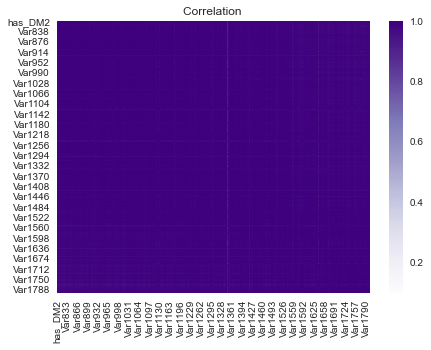

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=df.corr()
fig = plt.figure(figsize=(7,5))
r = sns.heatmap(corr, cmap='Purples')
r.set_title("Correlation ")

### PCA using 15 components (segun el paper)

In [210]:
df.head(5)

,has_DM2,Var801,Var802,Var803,Var804,Var805,Var806,Var807,Var808,Var809,...,Var1790,Var1791,Var1792,Var1793,Var1794,Var1795,Var1796,Var1797,Var1798,Var1799
0,1.0,342.313924,345.831464,350.693433,351.977234,350.031293,347.838913,345.068044,342.571307,343.545436,...,108.538098,110.498659,112.321475,113.032614,113.333334,113.333335,108.184039,104.333334,104.333335,107.969381
1,1.0,229.115253,232.168018,235.309601,240.293143,246.939294,248.781149,239.345218,230.797467,233.495050,...,77.605727,81.768669,83.581151,76.144672,72.084814,70.499059,72.688575,75.239578,78.048454,76.333566
2,1.0,478.687152,482.391803,487.687622,490.152795,490.062988,487.530145,479.262476,471.942273,476.618085,...,157.377112,165.926355,173.777301,169.998114,163.120084,153.971487,155.345288,156.982519,157.593143,160.385635
3,1.0,193.241297,195.137540,197.531128,198.902690,199.351753,198.346733,193.928314,189.964976,191.763367,...,60.614281,62.855419,64.535575,62.402160,61.675997,61.980951,61.809285,62.640090,65.896757,65.720650
4,1.0,196.158227,196.397023,196.127747,197.604958,200.658591,201.887231,198.831784,195.591904,190.016901,...,55.805688,61.699855,66.605765,61.119841,58.799999,58.800000,59.372144,60.712585,63.765710,64.557598


In [211]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
#x = df.iloc[:,2:3159]
x = df.iloc[:,0:1799]
# Separating out the target
y = df.loc[:,['has_DM2']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

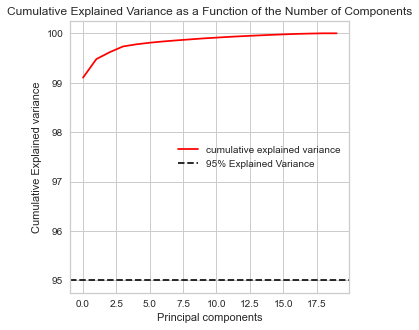

In [212]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x)
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(5, 5))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best')

In [213]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)

In [214]:
finalDf = pd.concat([principalDf, df[['has_DM2']]], axis = 1)
finalDf.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,has_DM2
0,27.839885,1.478445,1.680301,-0.810032,-0.622960,0.556289,0.391889,-0.017753,0.038826,0.289896,-0.620386,0.460089,-0.836813,0.047380,0.557342,1.0
1,-5.224356,-0.568513,1.666516,-1.209661,-0.408404,0.058839,-0.111337,-0.392976,-0.598495,-0.154812,-0.571003,-0.743891,0.054927,-0.093547,-0.310165,1.0
2,73.148583,1.793211,0.158606,-0.452376,0.113284,0.215662,-0.192439,-0.860852,0.279767,0.061045,0.139982,0.335151,0.568602,-0.533450,-0.405420,1.0


In [215]:
#finalDf.describe()

### Matris correlación despues PCA 15

Text(0.5, 1.0, 'Correlation ')

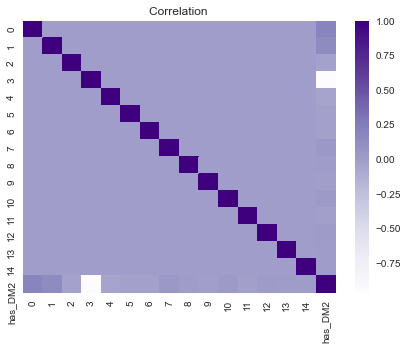

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=finalDf.corr()
fig = plt.figure(figsize=(7,5))
r = sns.heatmap(corr, cmap='Purples')
r.set_title("Correlation ")

### Analisis de modelos sobre data set con PCA

In [217]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import svm

from sklearn.model_selection import cross_val_score, StratifiedKFold

In [218]:
X, y = finalDf.drop('has_DM2', axis=1), finalDf['has_DM2']

#### La precisión del modelo se evaluará utilizando el método de retención.
Con este enfoque, dejamos una fracción de la muestra de entrenamiento (generalmente del 20% al 40%), entrenamos el modelo con el resto de los datos (60-80% de la muestra original) y calculamos alguna métrica de la calidad del modelo ( por ejemplo, el más simple es la proporción de respuestas correctas en el problema de clasificación) en una muestra diferida.

### TRAIN AND TEST SPLIT

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=7)

### Escalado y normalizado

In [220]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [221]:
y.value_counts(normalize=True)

1.0    0.55
0.0    0.45
Name: has_DM2, dtype: float64

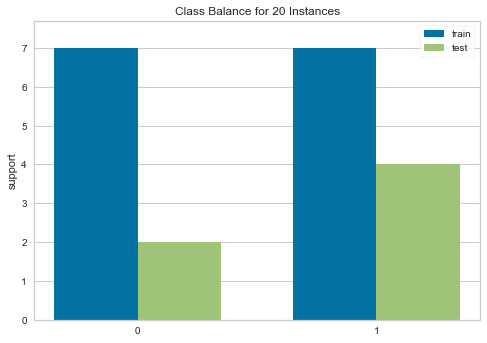

<AxesSubplot:title={'center':'Class Balance for 20 Instances'}, ylabel='support'>

In [222]:
# balanceo de clases en los conjuntos de test y train
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=[0, 1])
visualizer.fit(y_train, y_test)
visualizer.poof()

### Predicción sin optimización de hiper parametros

### K-NN

In [223]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train)  

#print(knn.score(X_train, y_train))

KNeighborsClassifier(n_neighbors=3)

In [224]:
pred_test_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, pred_test_knn)
knn_accuracy

0.8333333333333334

In [225]:
confusion_matrix(y_test, pred_test_logreg)

array([[2, 0],
       [1, 3]], dtype=int64)

### Logistic Regression

In [226]:
logreg = LogisticRegression(random_state=17, solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train);

In [227]:
pred_test_logreg = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, pred_test_logreg)
logreg_accuracy

0.8333333333333334

In [228]:
confusion_matrix(y_test, pred_test_logreg)

array([[2, 0],
       [1, 3]], dtype=int64)

### Random Forest

In [229]:
rf_clf = RandomForestClassifier(n_estimators=10, n_jobs=2, random_state=7)
rf_clf.fit(X_train, y_train);

In [230]:
pred_test_rf_clf = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, pred_test_rf_clf)
rf_accuracy

1.0

In [231]:
confusion_matrix(y_test, pred_test_rf_clf)

array([[2, 0],
       [0, 4]], dtype=int64)

### XGBoost

In [232]:
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train);

[20:03:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [233]:
pred_test_xgbc = xgbc.predict(X_test)
XGB_accuracy = accuracy_score(y_test, pred_test_xgbc)
XGB_accuracy

1.0

In [234]:
confusion_matrix(y_test, pred_test_xgbc)

array([[2, 0],
       [0, 4]], dtype=int64)

### Support Vector Machines 1

In [235]:
clf_svm = svm.SVC(gamma='scale')
clf_svm.fit(X_train, y_train);

In [236]:
pred_test_svm = clf_svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, pred_test_svm)
svm_accuracy

0.6666666666666666

In [237]:
confusion_matrix(y_test, pred_test_svm)

array([[2, 0],
       [2, 2]], dtype=int64)

### Support Vector Machines 2

In [238]:
clf_svm = svm.SVC(C=2, decision_function_shape='ovo', gamma='auto', kernel='linear',
    random_state=1)
clf_svm.fit(X_train, y_train);

In [239]:
pred_test_svm = clf_svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, pred_test_svm)
svm_accuracy

0.8333333333333334

In [240]:
confusion_matrix(y_test, pred_test_svm)

array([[2, 0],
       [1, 3]], dtype=int64)

## Primera validación cruzada

In [241]:
accuracy = pd.DataFrame({
    'xgboost': [XGB_accuracy],
    'logreg': [logreg_accuracy],
    'random forest': [rf_accuracy],
    'SVM': [svm_accuracy]
    }, index=['accuracy'])

In [242]:
skf = StratifiedKFold(n_splits = 5, random_state=1, shuffle = True)

In [243]:
svm_cvs = cross_val_score(clf_svm, X_train, y_train, scoring='accuracy', cv = skf).mean()
xgb_cvs = cross_val_score(xgbc, X_train, y_train, scoring='accuracy', cv = skf).mean()
logreg_cvs = cross_val_score(logreg, X_train, y_train, scoring='accuracy', cv = skf).mean()
rf_cvs = cross_val_score(rf_clf, X_train, y_train, scoring='accuracy', cv = skf).mean()

[20:03:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:03:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:03:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:03:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [244]:
accuracy_cvs = pd.DataFrame({
    'xgboost': [xgb_cvs],
    'logreg': [logreg_cvs],
    'random forest': [rf_cvs],
    'SVM': [svm_cvs]
    }, index=['cvs_mean'])

In [245]:
accuracy = accuracy.append(accuracy_cvs)

In [246]:
accuracy

,xgboost,logreg,random forest,SVM
accuracy,1.0,0.833333,1.000000,0.833333
cvs_mean,1.0,0.666667,0.933333,0.666667


### Optimización de los hiper-parámetros de los algoritmos para SVM y LongReg

#### Support Vecton Machive v2

In [247]:
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

In [248]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
# Create a classifier object with the classifier and parameter candidates
clf = GridSearchCV(estimator=clf_svm, param_grid=parameter_candidates, n_jobs=-1, cv=5)

# Train the classifier on data1's feature and target data
clf.fit(X_train, y_train)  

GridSearchCV(cv=5,
             estimator=SVC(C=2, decision_function_shape='ovo', gamma='auto',
                           kernel='linear', random_state=1),
             n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [249]:
clf.best_score_

0.8666666666666666

In [250]:
clf.best_estimator_

SVC(C=100, decision_function_shape='ovo', gamma=0.001, random_state=1)

In [251]:
clf.score(X_test, y_test)

1.0

In [252]:
pred_test_svm = clf.best_estimator_.predict(X_test)
svm_accuracy = accuracy_score(y_test, pred_test_svm)
svm_accuracy

1.0

In [253]:
confusion_matrix(y_test, pred_test_svm)

array([[2, 0],
       [0, 4]], dtype=int64)

#### Regresión logistica

In [254]:
grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}

In [255]:
logreg_cv = GridSearchCV(logreg,grid,cv=4)
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000, random_state=17),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2']})

In [256]:
logreg_cv.best_params_

{'C': 10.0, 'penalty': 'l2'}

In [257]:
logreg_cv.best_score_

0.75

In [258]:
pred_test_logreg_cv = logreg_cv.best_estimator_.predict(X_test)

In [259]:
accuracy_score(y_test, pred_test_logreg_cv)

0.8333333333333334

In [260]:
confusion_matrix(y_test, pred_test_logreg_cv)

array([[2, 0],
       [1, 3]], dtype=int64)

### Calidad del modelo (estimada en base a muestreo diferido)

In [261]:
accuracy = pd.DataFrame({
    'xgboost': [XGB_accuracy],
    'logreg': [logreg_accuracy],
    'random forest': [rf_accuracy],
    'SVM': [svm_accuracy]
    }, index=['accuracy'])

In [262]:
accuracy = accuracy.append(accuracy_cvs)
accuracy

,xgboost,logreg,random forest,SVM
accuracy,1.0,0.833333,1.000000,1.000000
cvs_mean,1.0,0.666667,0.933333,0.666667


### Validación cruzada


In [263]:
skf = StratifiedKFold(n_splits = 5, random_state=1, shuffle = True)

In [264]:
svm_cvs = cross_val_score(clf_svm, X_train, y_train, scoring='accuracy', cv = skf).mean()
xgb_cvs = cross_val_score(xgbc, X_train, y_train, scoring='accuracy', cv = skf).mean()
logreg_cvs = cross_val_score(logreg, X_train, y_train, scoring='accuracy', cv = skf).mean()
rf_cvs = cross_val_score(rf_clf, X_train, y_train, scoring='accuracy', cv = skf).mean()

[20:03:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:03:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:03:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:03:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [265]:
accuracy_cvs = pd.DataFrame({
    'xgboost': [xgb_cvs],
    'logreg': [logreg_cvs],
    'random forest': [rf_cvs],
    'SVM': [svm_cvs]
    }, index=['cvs_mean'])

In [266]:
accuracy = accuracy.append(accuracy_cvs)

In [267]:
accuracy

,xgboost,logreg,random forest,SVM
accuracy,1.0,0.833333,1.000000,1.000000
cvs_mean,1.0,0.666667,0.933333,0.666667
cvs_mean,1.0,0.666667,0.933333,0.666667


### Classification Report and ROC Curve

In [268]:
print('**Logistic Regression**\n',classification_report(y_test, pred_test_logreg, target_names=['0 - healthy','1 - diabet ']))

**Logistic Regression**
               precision    recall  f1-score   support

 0 - healthy       0.67      1.00      0.80         2
 1 - diabet        1.00      0.75      0.86         4

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6



ROC AUC: 0.88


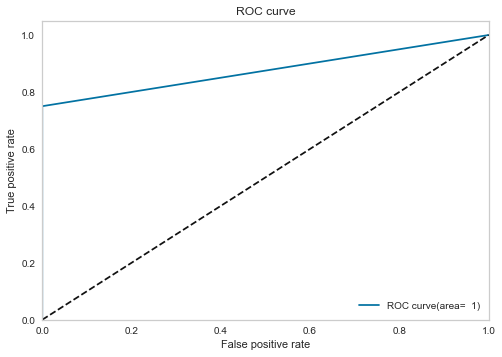

In [269]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score,auc
fpr,tpr,_=roc_curve(y_test,pred_test_logreg)
#calculate AUC
roc_auc=auc(fpr,tpr)
print('ROC AUC: %0.2f' % roc_auc)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [270]:
print('**Random Forest**\n',classification_report(y_test, pred_test_rf_clf, target_names=['0 - healthy','1 - diabet ']))

**Random Forest**
               precision    recall  f1-score   support

 0 - healthy       1.00      1.00      1.00         2
 1 - diabet        1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



ROC AUC: 1.00


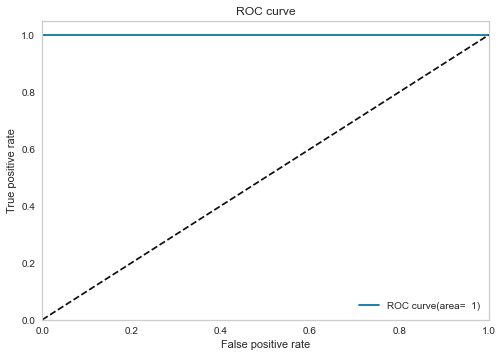

In [271]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score,auc
fpr,tpr,_=roc_curve(y_test,pred_test_rf_clf)
#calculate AUC
roc_auc=auc(fpr,tpr)
print('ROC AUC: %0.2f' % roc_auc)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [272]:
print('**SVM**\n',classification_report(y_test, pred_test_svm, target_names=['0 - healthy','1 - diabet ']))

**SVM**
               precision    recall  f1-score   support

 0 - healthy       1.00      1.00      1.00         2
 1 - diabet        1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



ROC AUC: 1.00


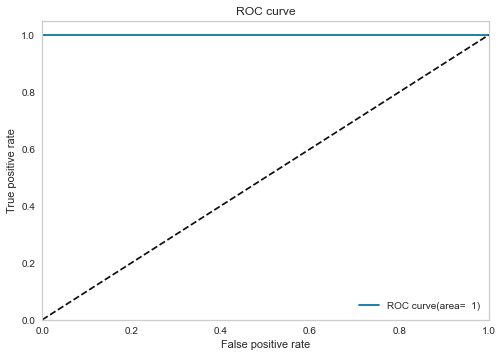

In [273]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score,auc
fpr,tpr,_=roc_curve(y_test,pred_test_svm)
#calculate AUC
roc_auc=auc(fpr,tpr)
print('ROC AUC: %0.2f' % roc_auc)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [274]:
print('**xgbc**\n',classification_report(y_test, pred_test_xgbc, target_names=['0 - healthy','1 - diabet ']))

**xgbc**
               precision    recall  f1-score   support

 0 - healthy       1.00      1.00      1.00         2
 1 - diabet        1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



ROC AUC: 1.00


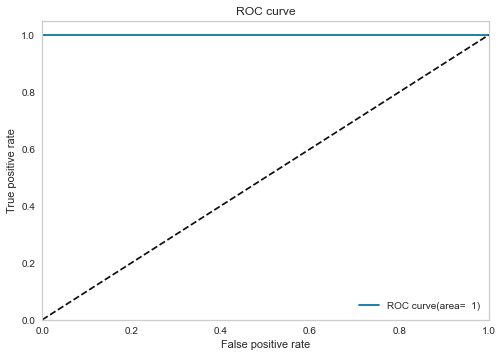

In [275]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score,auc
fpr,tpr,_=roc_curve(y_test,pred_test_xgbc)
#calculate AUC
roc_auc=auc(fpr,tpr)
print('ROC AUC: %0.2f' % roc_auc)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

###  (confusion matrix) 

In [276]:
print('**Logistic Regression**\n',confusion_matrix(y_test, pred_test_logreg))

**Logistic Regression**
 [[2 0]
 [1 3]]


In [277]:
print('**Random Forest**\n',confusion_matrix(y_test, pred_test_rf_clf))

**Random Forest**
 [[2 0]
 [0 4]]


In [278]:
print('**SVM**\n',confusion_matrix(y_test, pred_test_svm))

**SVM**
 [[2 0]
 [0 4]]


In [279]:
print('**xgbc**\n',confusion_matrix(y_test, pred_test_xgbc))

**xgbc**
 [[2 0]
 [0 4]]


## Artificial Neural Networks

In [280]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Conv2D,MaxPooling2D, Flatten

model = Sequential()
model.add(Dense(32,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(64,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(64,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(128,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(128,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))

In [281]:
print(model.summary())
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="sgd",metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=10, epochs=50, verbose=1, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test,y_test, verbose=0)
print("Loss : "+str(loss))
print("Accuracy :"+str(accuracy*100.0))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                512       
_________________________________________________________________
activation_8 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                2112      
_________________________________________________________________
activation_9 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
activation_10 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)              